In [1]:
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install requirements

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 12.3 MB/s eta 0:00:00


In [2]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
from google.colab import files  # Import files module if using Google Colab

# Upload the image file
uploaded = files.upload()  # Opens a file upload dialog

if uploaded:
    # Retrieve the uploaded file's name
    img_path = list(uploaded.keys())[0]

    # Load YOLOv5 model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt', force_reload=True)

    # Set confidence threshold and image size directly on the model
    model.conf = 0.25  # Set confidence threshold
    model.iou = 0.45  # Set IoU threshold (optional)
    model.max_det = 1000  # Maximum number of detections (optional)

    # Perform detection and save results in 'runs/detect/exp' directory
    results = model(img_path)
    results.save()  # This will save the output image with rectangles in 'runs/detect/exp'

    # Find the saved output image file in the 'runs/detect/exp' directory
    output_dir = '/content/yolov5/runs/detect/exp'
    output_files = os.listdir(output_dir)

    # Check if any file was generated in the output directory
    if output_files:
        output_file = os.path.join(output_dir, output_files[0])  # Assumes only one image in 'exp' folder

        # Display the output image with bounding boxes using matplotlib
        img = Image.open(output_file)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("No output image found in the 'runs/detect/exp' directory.")
else:
    print("No file uploaded.")

Saving Photo on 11-11-24 at 21.50.jpg to Photo on 11-11-24 at 21.50.jpg


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 132MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp


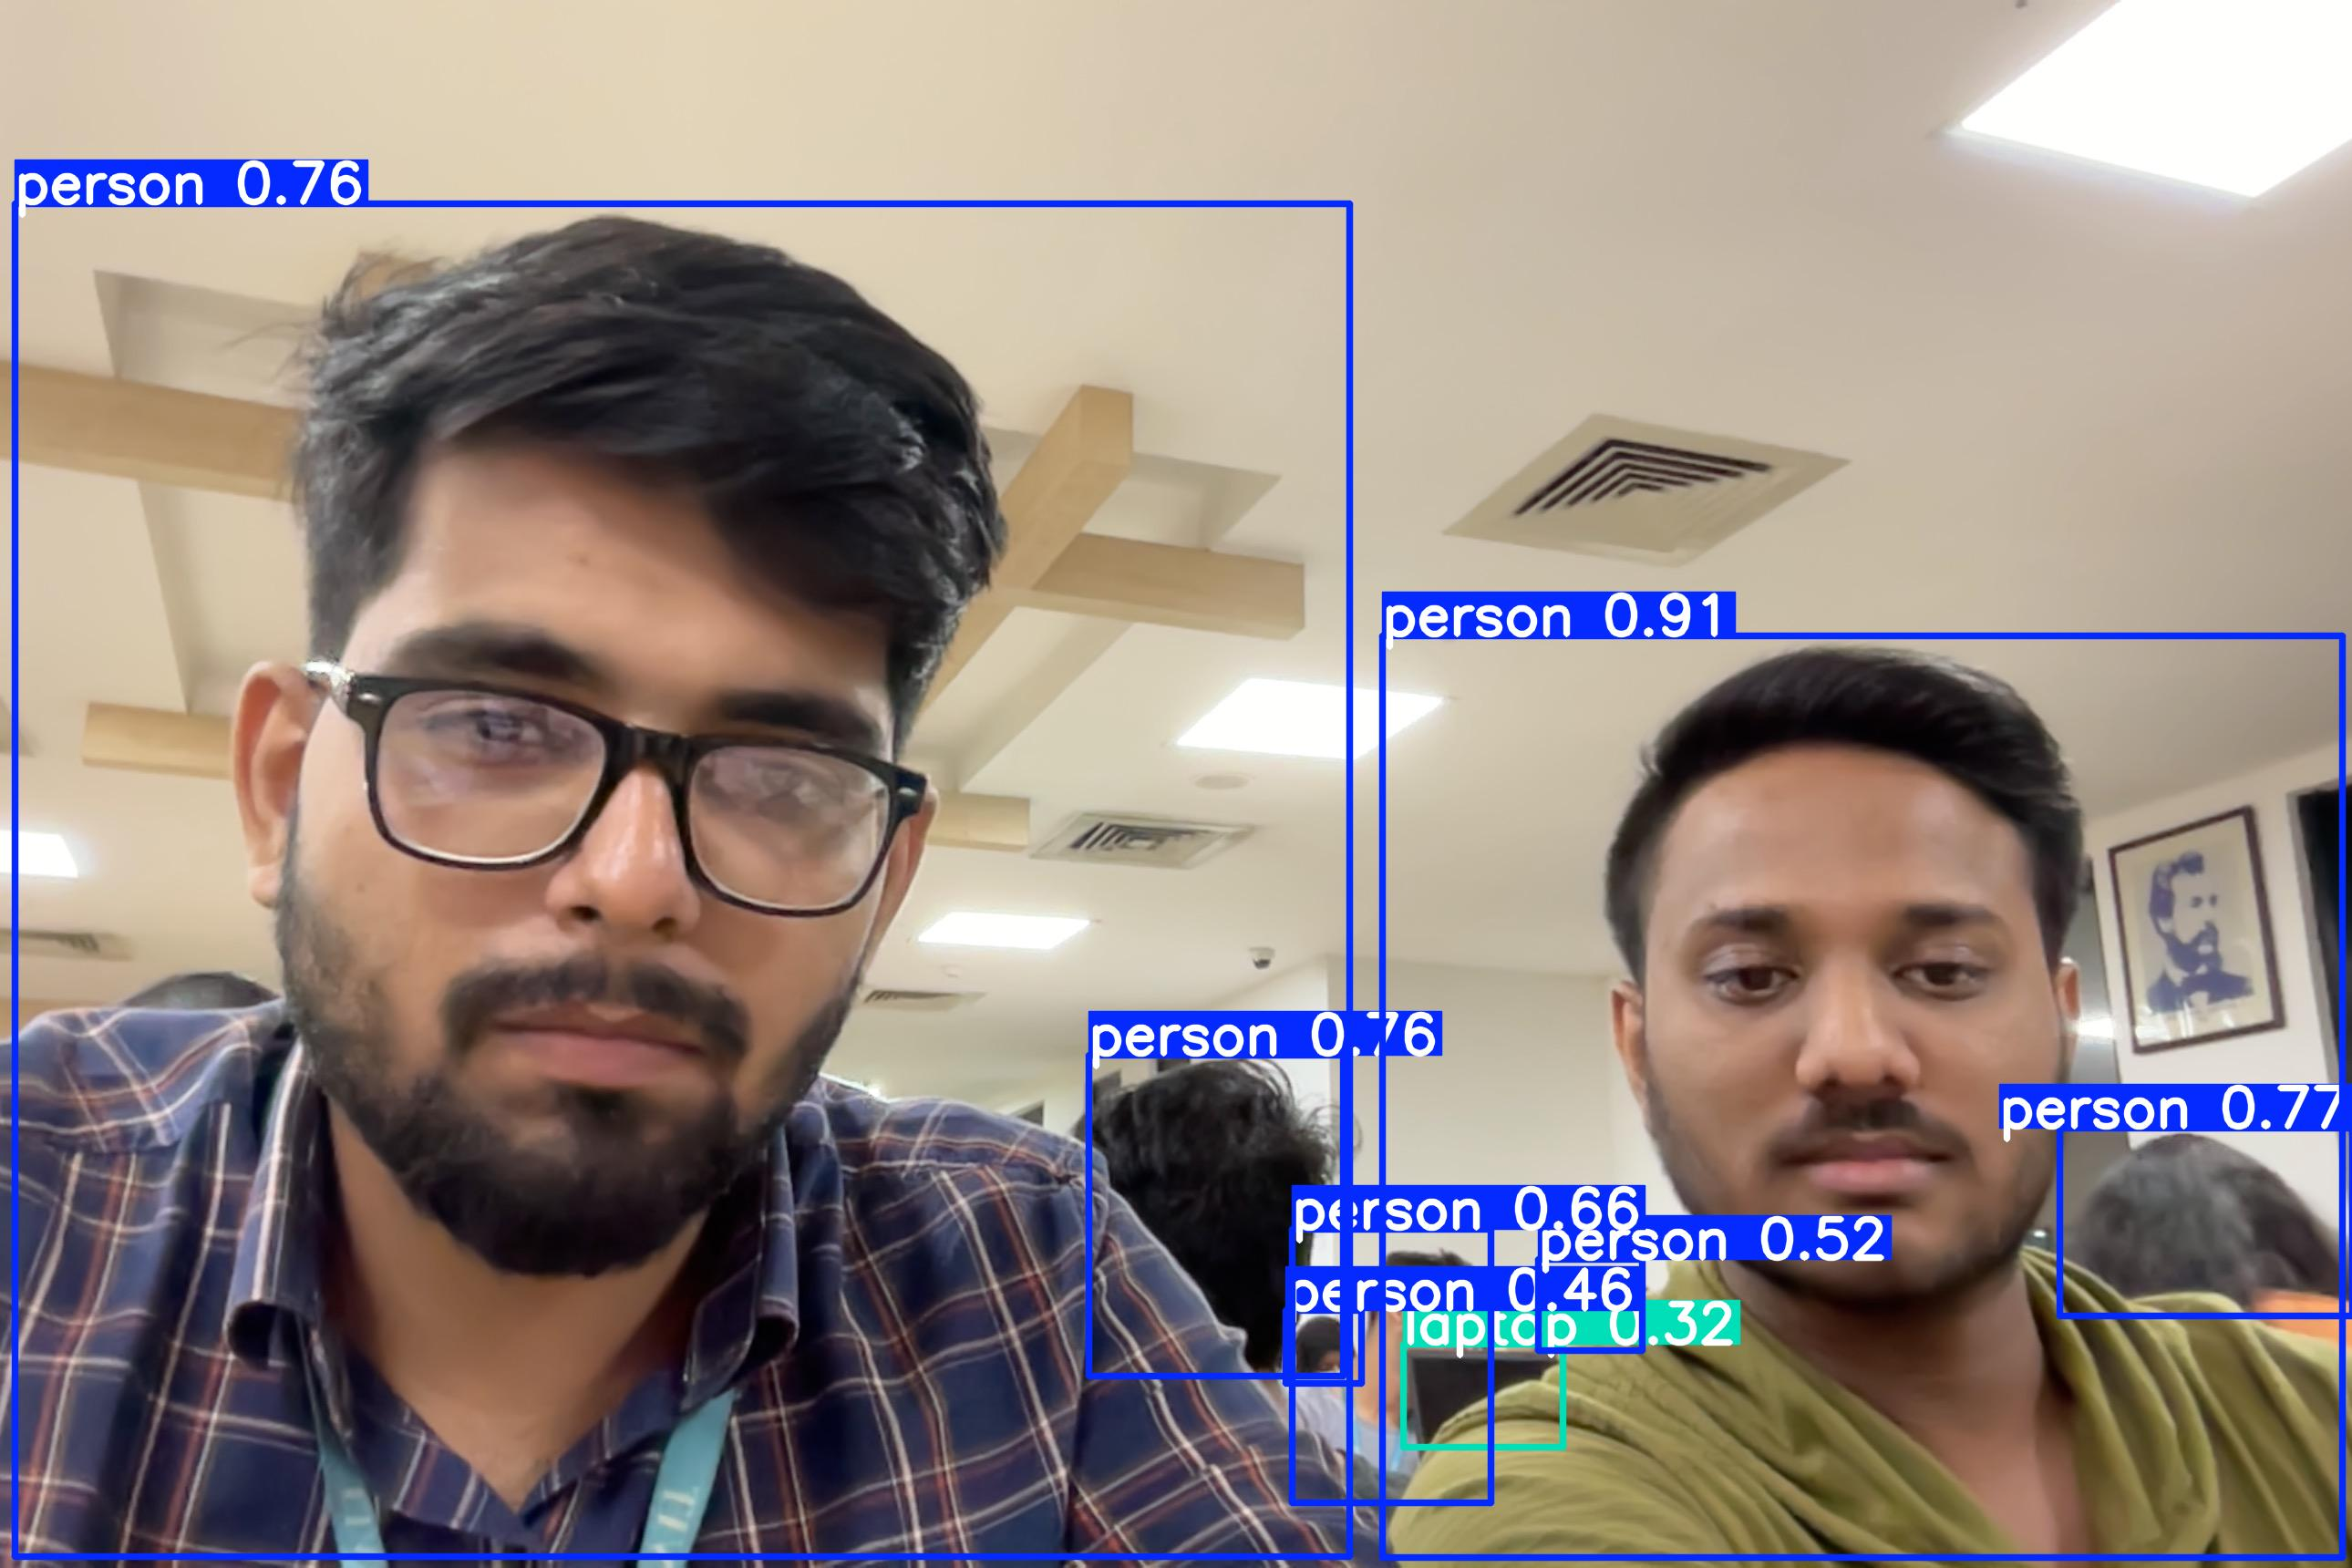

In [5]:
display.Image(filename='/content/yolov5/runs/detect/exp/'+ img_path, width=600)